# Prédiction du cours boursier

## Imports

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
)
from statsmodels.tsa.arima.model import ARIMA

from src.functions.arima_parameters import arima_parameters
from src.utils import init_notebook

In [ ]:
init_notebook()

In [ ]:
data_folder = "data/processed_data/detrend_data/LinearMADetrend/window-100"
stock_name = "AAPL"

In [ ]:
df = pd.read_csv(
    f"{data_folder}/{stock_name}.csv", parse_dates=["Date"], index_col="Date"
)
print(f"{df.shape = }")

df.shape = (756, 6)


In [ ]:
prediction_results_dict = {}

## ARIMA

### Predict new price

In [ ]:
# Take close price as target variable
price = df["Close"]

In [ ]:
# Example: Fit ARMA(1,1) model
model = ARIMA(price, order=arima_parameters)
fitted_arima = model.fit()

# Display model summary
print(fitted_arima.summary())

C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  756
Model:               ARIMA(10, 0, 10)   Log Likelihood               -1568.804
Date:                Mon, 05 Feb 2024   AIC                           3181.607
Time:                        00:57:43   BIC                           3283.424
Sample:                             0   HQIC                          3220.825
                                - 756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0503      0.130      0.388      0.698      -0.204       0.305
ar.L1          1.2910      0.235      5.488      0.000       0.830       1.752
ar.L2         -0.5484      0.283     -1.936      0.0

C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Make predictions

forecast_steps = 60  # N days to forecast
forecast = fitted_arima.get_forecast(steps=forecast_steps)

date_range = pd.date_range(
    price.index[-1], periods=forecast_steps + 1, freq=price.index.freq
)
forecast_index = date_range[1:]  # Exclude price.index[-1]

predicted_values = forecast.predicted_mean

C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


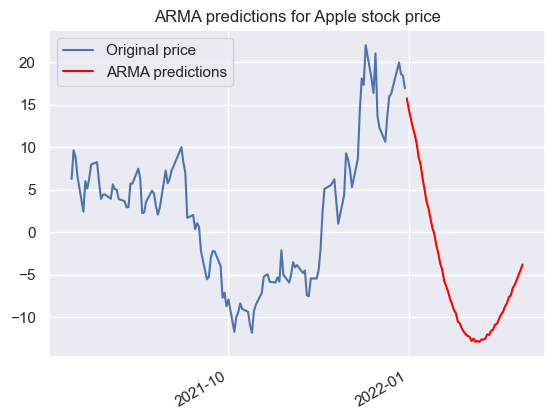

In [ ]:
plot_n_days_prior_pred = 2 * forecast_steps

plt.plot(price[-plot_n_days_prior_pred:], label="Original price")
plt.plot(forecast_index, predicted_values, label="ARMA predictions", color="red")
plt.title("ARMA predictions for Apple stock price")
plt.legend()


# Display limited number of date index
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# Rotate x-axis labels
plt.gcf().autofmt_xdate()

plt.show()

### Train test split

In [ ]:
train_test_split_date = pd.Timestamp("2021-10-01")
train, test = (
    price[price.index <= train_test_split_date],
    price[price.index > train_test_split_date],
)

In [ ]:
model = ARIMA(train, order=arima_parameters)
result = model.fit()

C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtual

In [ ]:
forecast_steps = len(test)
forecast = result.get_forecast(steps=forecast_steps)
predicted_values = forecast.predicted_mean

C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


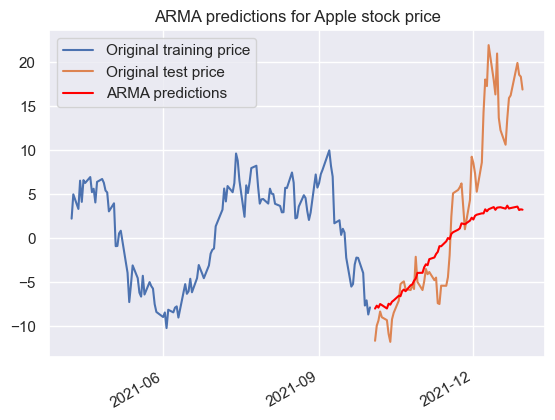

In [ ]:
plot_n_days_prior_pred = 2 * forecast_steps

plt.plot(train[-plot_n_days_prior_pred:], label="Original training price")
plt.plot(test, label="Original test price")
plt.plot(test.index, predicted_values, label="ARMA predictions", color="red")
plt.title("ARMA predictions for Apple stock price")
plt.legend()


# Display limited number of date index
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# Rotate x-axis labels
plt.gcf().autofmt_xdate()

plt.show()

## Prophet

### Pré-traitement pour Prophet

In [ ]:
# relecture des données (sans detrend)
data_folder = "data/raw_data"
stock_name = "AAPL"
df = pd.read_csv(
    f"{data_folder}/{stock_name}.csv", parse_dates=["Date"], index_col="Date"
)
print(f"{df.shape = }")

df.shape = (756, 6)


In [ ]:
train_start_date = "2019"
train_end_date = "2021-10-01"
df_train = df.loc[train_start_date:train_end_date]

In [ ]:
df_train.shape

(694, 6)

In [ ]:
x = df_train[[]].copy()

In [ ]:
x["ds"] = df_train.index
x["y"] = df_train[["Close"]]

In [ ]:
x.head()

,ds,y
Date,,
2019-01-02,2019-01-02,39.480000
2019-01-03,2019-01-03,35.547501
2019-01-04,2019-01-04,37.064999
2019-01-07,2019-01-07,36.982498
2019-01-08,2019-01-08,37.687500


### Prédiction

#### Calcul de la prédiction

In [ ]:
model = Prophet()
model.fit(x)

00:58:45 - cmdstanpy - INFO - Chain [1] start processing
00:58:46 - cmdstanpy - INFO - Chain [1] done processing


<prophet.forecaster.Prophet>

In [ ]:
future = model.make_future_dataframe(periods=100)
future.tail()

,ds
789,2022-01-05
790,2022-01-06
791,2022-01-07
792,2022-01-08
793,2022-01-09


In [ ]:
forecast = model.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
789,2022-01-05,166.742999,159.907659,173.951904
790,2022-01-06,166.593156,159.536440,173.435339
791,2022-01-07,166.485685,159.430135,173.176469
792,2022-01-08,174.417874,167.178140,181.860503
793,2022-01-09,174.421259,167.024041,182.281410


#### Affichage de la prédiction

C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<matplotlib.legend.Legend>

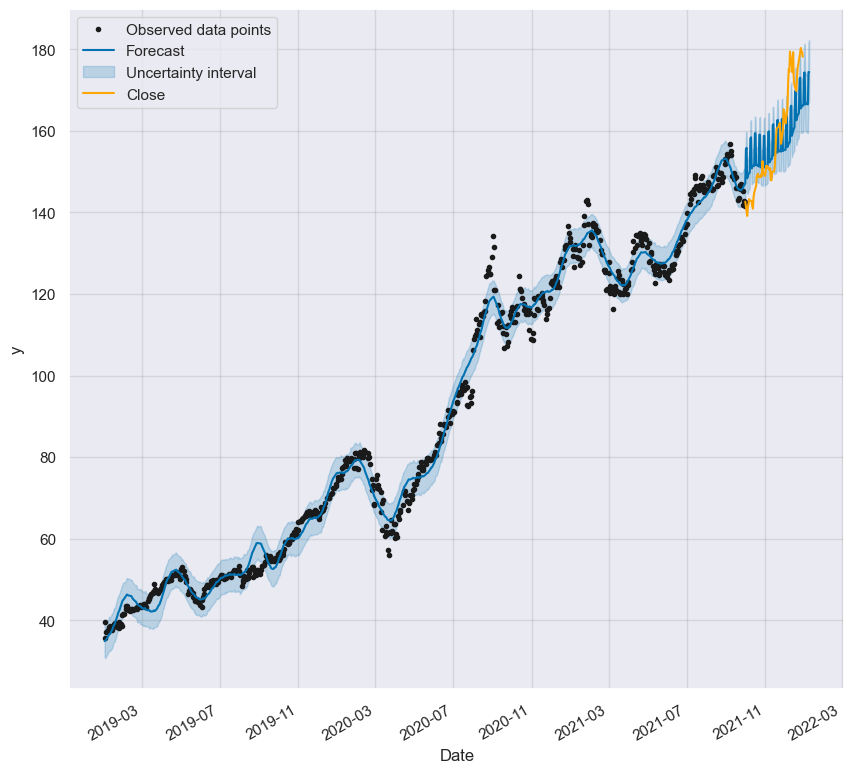

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 10))
fig1 = model.plot(forecast, ax=ax1)
df[["Close"]].loc[train_end_date:].plot(ax=ax1, color="orange")
plt.legend()

### Décomposition

C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of

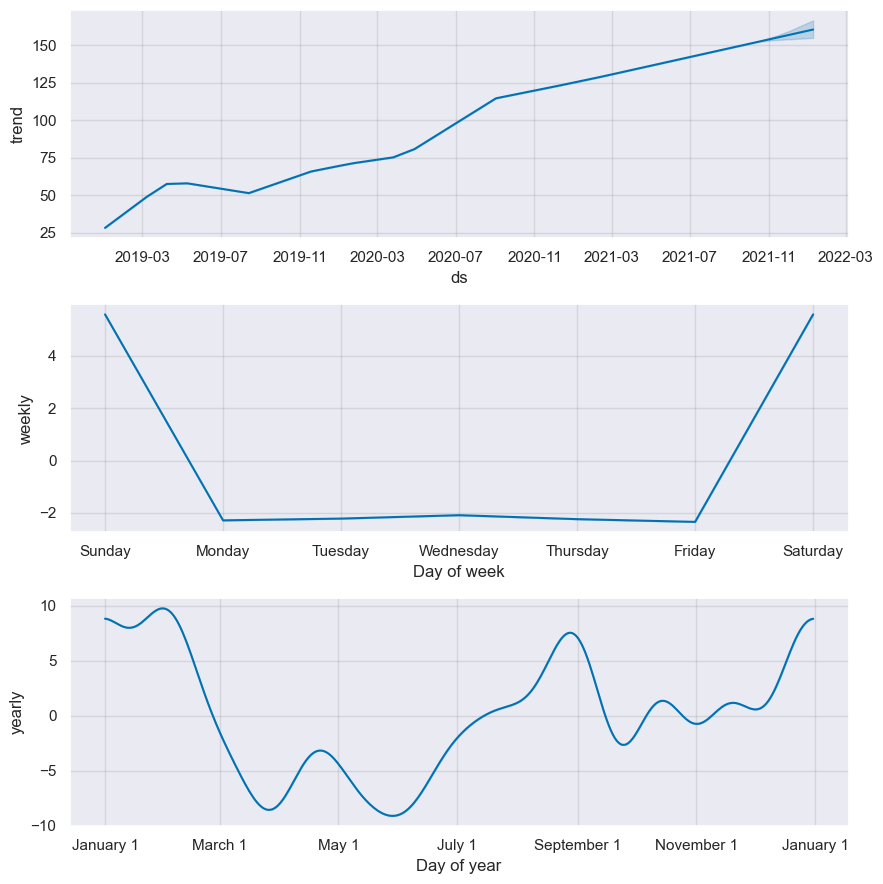

In [ ]:
fig2 = model.plot_components(forecast)

### Métriques de prédiction

In [ ]:
# we redo the prediction because currently we do not handle the weekends with Prophet
# (since weekends data do not exist in stock data)
model = Prophet()
model.fit(x)
future = model.make_future_dataframe(periods=62)
future.tail()
forecast = model.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

00:59:02 - cmdstanpy - INFO - Chain [1] start processing
00:59:03 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
751,2021-11-28,162.895645,157.556844,168.010428
752,2021-11-29,155.053766,149.926821,160.140174
753,2021-11-30,155.172747,149.930594,160.067333
754,2021-12-01,155.375946,150.255613,160.088363
755,2021-12-02,155.324346,150.060230,160.208160


In [ ]:
forecast.index = df.index

In [ ]:
y_true = df[["Close"]].loc[train_end_date:]
y_pred = forecast[["yhat"]].iloc[-y_true.shape[0] :]

In [ ]:
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

RMSE: 11.965935077902962
MAE: 9.370173438133252
MAPE: 0.05752552153894722%


In [ ]:
prediction_results_dict["Prophet"] = [rmse, mae, mape]

## Comparaison des modèles

In [ ]:
prediction_results_df = pd.DataFrame(prediction_results_dict).T
prediction_results_df.columns = ["RMSE", "MAE", "MAPE"]
prediction_results_df

,RMSE,MAE,MAPE
Prophet,11.965935,9.370173,0.057526


In [ ]:
print(prediction_results_df.to_markdown())

|         |    RMSE |     MAE |      MAPE |
|:--------|--------:|--------:|----------:|
| Prophet | 11.9659 | 9.37017 | 0.0575255 |
